In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [24]:
df.drop(columns=['id'],inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [26]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


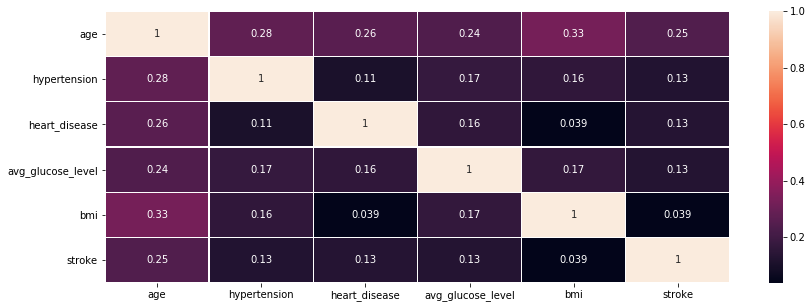

In [28]:
plt.figure(figsize=(14,5))
sns.heatmap(df.corr(),annot = True,linewidth=0.5)

In [29]:
print(df['ever_married'].unique())
print(df['work_type'].unique())
print(df['Residence_type'].unique())
print(df['smoking_status'].unique())

['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,4,5,6,9])], remainder='passthrough')
df = np.array(ct.fit_transform(df))
df

array([[  0.        ,   1.        ,   0.        , ..., 228.69      ,
         36.6       ,   1.        ],
       [  1.        ,   0.        ,   0.        , ..., 202.21      ,
         28.89323691,   1.        ],
       [  0.        ,   1.        ,   0.        , ..., 105.92      ,
         32.5       ,   1.        ],
       ...,
       [  1.        ,   0.        ,   0.        , ...,  82.99      ,
         30.6       ,   0.        ],
       [  0.        ,   1.        ,   0.        , ..., 166.29      ,
         25.6       ,   0.        ],
       [  1.        ,   0.        ,   0.        , ...,  85.28      ,
         26.2       ,   0.        ]])

In [31]:
y = df[:,-1]
y

array([1., 1., 1., ..., 0., 0., 0.])

In [32]:
X = df[:,:-1]
X

array([[  0.        ,   1.        ,   0.        , ...,   1.        ,
        228.69      ,  36.6       ],
       [  1.        ,   0.        ,   0.        , ...,   0.        ,
        202.21      ,  28.89323691],
       [  0.        ,   1.        ,   0.        , ...,   1.        ,
        105.92      ,  32.5       ],
       ...,
       [  1.        ,   0.        ,   0.        , ...,   0.        ,
         82.99      ,  30.6       ],
       [  0.        ,   1.        ,   0.        , ...,   0.        ,
        166.29      ,  25.6       ],
       [  1.        ,   0.        ,   0.        , ...,   0.        ,
         85.28      ,  26.2       ]])

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [34]:
from sklearn.model_selection import train_test_split


In [35]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=0)

In [36]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [37]:
y_pred = classifier.predict(test_x)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [38]:
test_y

array([1., 0., 0., ..., 0., 1., 0.])

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(test_y, y_pred)
print(cm)
str(accuracy_score(test_y, y_pred)*100)+"%"

[[939  29]
 [ 49   5]]


'92.3679060665362%'